# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `2` | `Questions`

### <font color = green> Activation of necessary libraries. </font>

In [1]:
import pandas as pd
import numpy as np
# !pip install matplotlib
import matplotlib.pyplot as plt
# import ast


In [2]:
%whos

Variable   Type      Data/Info
------------------------------
np         module    <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd         module    <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt        module    <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>


### <font color = "blue"> `IMPORT` your dataset: `bank_loan.csv`. </font>

In [3]:
bank_loans = pd.read_csv("bank_loan.csv", low_memory=False)
# DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.

In [4]:
bank_loans.shape
#very huge wide dataframe, got 111 columns

(39717, 111)

In [5]:
num_r, num_c = bank_loans.shape
print (num_r, num_c)

39717 111


In [6]:
# use .unique() to get the warning column's data values
col47_data = bank_loans.iloc[:,47].unique()
col47_data
# array([nan, 'Jun-16', 'Jul-16'], dtype=object)

array([nan, 'Jun-16', 'Jul-16'], dtype=object)

In [7]:
for each_data in col47_data:
    print(type(each_data))

<class 'float'>
<class 'str'>
<class 'str'>


In [8]:
bank_loans.iloc[:,47]

0           NaN
1           NaN
2           NaN
3           NaN
4        Jun-16
          ...  
39712       NaN
39713       NaN
39714       NaN
39715       NaN
39716       NaN
Name: next_pymnt_d, Length: 39717, dtype: object

### Question 1. Data `Inspection`

#### Question 1.1. How would you look at the first few rows of the DF?

In [9]:
bank_loans.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### Question 1.2. How would you look at all the column names?

In [10]:
col_names = list(bank_loans.columns)
print(col_names)

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il

### Question 2. Data `Wrangling`

#### Question 2.1. How would you check the number of missing values in each column?

In [11]:
mis_val_count = bank_loans.isnull().sum()
mis_val_count

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

> There are columns have a large number of missing values 

> Let's clean them first.

#### Question 2.2. How would you find the percentage of missing values in each column? 
> Hint: Use the missing values and divide it by something.

In [12]:
mis_val_pct = mis_val_count / num_r * 100
mis_val_pct

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

#### Question 2.3. How would you remove the columns having more than 90% missing values?

In [13]:
(len(mis_val_pct))

111

In [14]:
sum(mis_val_pct > 90)
# there are 56 columns to delete, and thus leaving 55 columns of valid data

56

In [15]:
# use boolean index to filter on columns to delete
id_to_drop = mis_val_pct > 90
col_to_drop = bank_loans.columns[id_to_drop]
id_to_drop

id                            False
member_id                     False
loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
                              ...  
tax_liens                     False
tot_hi_cred_lim                True
total_bal_ex_mort              True
total_bc_limit                 True
total_il_high_credit_limit     True
Length: 111, dtype: bool

In [16]:
bank_loans_clean = bank_loans.copy()
bank_loans_clean.drop(columns=col_to_drop, inplace=True)

In [17]:
bank_loans_clean

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


> Let's check the number of missing values again.

In [18]:
new_mis_val_count = bank_loans_clean.isnull().sum()

#### Question 2.4. How would you remove columns having more than 30% of missing values?
> Hint: With so **few** columns with more than 30% missing values, can you `drop` them by **name**?

In [19]:
new_mis_val_count.sort_values()

id                                0
earliest_cr_line                  0
open_acc                          0
pub_rec                           0
revol_bal                         0
total_acc                         0
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
delinq_2yrs                       0
total_pymnt_inv                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
last_pymnt_amnt                   0
policy_code                       0
application_type                  0
acc_now_delinq                    0
delinq_amnt                       0
total_rec_prncp                   0
dti                               0
inq_last_6mths                    0
zip_code                          0
installment                       0
grade                             0
sub_grade                   

In [20]:
# can only run this once, as the cleaned dataframe will no longer have column names match the list again
eye_filter_col_to_drop = list((new_mis_val_count.sort_values()).index)[-2:]

bank_loans_clean.drop(columns=eye_filter_col_to_drop, inplace = True)
# 2 columns deleted by list of columns names

In [21]:
bank_loans_clean

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


> Let's check number of missing values again, does all columns have **less than** 90% missing values?

In [22]:
r, c = bank_loans_clean.shape
print (r, c)

39717 53


In [23]:
new_mis_val_pct = bank_loans_clean.isnull().sum() / r * 100
(new_mis_val_pct<90).sum()

53

#### Question 2.5. How would you check missing values rows-wise, by the way?
> Hint: What does the `axis` argument do?

In [24]:
na_in_rows = bank_loans_clean.isnull().sum(axis=1)
na_in_rows

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [25]:
na_in_cols = bank_loans_clean.isnull().sum()
na_in_cols

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [26]:
# num of na in row count equals to that in column count
na_in_rows.sum() == na_in_cols.sum()

True

> How would you check whether some rows have more than 5 missing values

In [27]:
na_in_rows[na_in_rows>5]
# empty series is returned

Series([], dtype: int64)

In [28]:
# max value of NA in row count is 5, the above result is correct
# thus no rows have more than 5 missing values
na_in_rows.max()

5

> The dataset is cleaned now; let's check whether all the columns are in the correct format or not.

In [29]:
data_types = bank_loans_clean.dtypes
print(data_types)

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mt

> The column `int_rate` is character type, let's convert it to float.

In [30]:
type(bank_loans_clean.int_rate[0])

str

In [31]:
bank_loans_clean.int_rate[0]

'10.65%'

In [32]:
type(bank_loans_clean.funded_amnt_inv[0])

numpy.float64

In [33]:
loan = bank_loans_clean.copy()
# need to strip the "%" before covert the type from str to float
loan['int_rate_self_convert'] =loan['int_rate'].str.rstrip('%').astype(float)
type(loan.int_rate_self_convert[0])

numpy.float64

#### Question 2.6. How would you use `lambda` to convert the data type of `int_rate`?

In [34]:
bank_loans_clean['int_rate'] = bank_loans_clean['int_rate'].apply(lambda x: float(x[:-1]))

> Let's check the data types again.

In [35]:
bank_loans_clean['int_rate'][0]

10.65

In [36]:
type(bank_loans_clean['int_rate'][0])

numpy.float64

> Lets extract the numeric part from the variable employment length.

> First, let's drop the missing values from the column (otherwise the regex code below throws error) using regular expression to extract numeric values from the string convert to numeric

In [37]:
loan.emp_length.isnull().sum()

1075

In [38]:
# if wish to dropping rows with NA for whole dataframe, may leave the subset variable
# loan.dropna(subset=['emp_length'], inplace=True)
# len(bank_loans_clean) - len(loan)

> Let's take a look at type of the columns again

In [39]:
loan.isna().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [40]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [41]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

### Question 3. Exploratory Data Analysis (EDA)

> There are some variables not available at the time of loan application, and thus they cannot be used as predictors for credit approval. 

In [42]:
variables_to_remove = [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]

variables_to_remove

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

In [43]:
len(variables_to_remove)

21

#### Question 3.1. How would you remove the set of variables from `variables_to_remove` from the dataset?

In [44]:
loan_3_1 = loan.copy()
loan_3_1 = loan_3_1.drop('int_rate_self_convert',axis=1)

In [45]:
loan_3_1.drop(columns = variables_to_remove, inplace = True)

In [46]:
loan_3_1

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,addr_state,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,AZ,27.65,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,GA,1.00,f,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,IL,8.72,f,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,CA,20.00,f,0.0,1,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,OR,17.94,f,0.0,1,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,CO,11.33,f,NaN,1,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NC,6.40,f,NaN,1,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,MA,2.30,f,NaN,1,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,MD,3.72,f,NaN,1,0,NaN,0,NaN,NaN


#### Question 3.2. Are there any other variables that we can remove from the dataset also?

-  Also, we won't use the variables zip code, address, state etc. 
-  The variable `title` is derived from the variable `purpose` thus let get rid of all these variables as well

In [47]:
loan_3_2 = loan_3_1.copy()

In [48]:
list(loan_3_2.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens']

In [49]:
loan_3_2.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
initial_list_status            object
collections_12_mths_ex_med    float64
policy_code 

In [50]:
other_variables_to_remove =\
[
    'zip_code',
    'addr_state',
    'title'
]



In [51]:
loan_3_2.drop(columns = other_variables_to_remove, inplace = True)

In [52]:
loan_3_2

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,purpose,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,credit_card,27.65,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,car,1.00,f,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,small_business,8.72,f,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,other,20.00,f,0.0,1,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,other,17.94,f,0.0,1,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,home_improvement,11.33,f,NaN,1,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,credit_card,6.40,f,NaN,1,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,debt_consolidation,2.30,f,NaN,1,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,other,3.72,f,NaN,1,0,NaN,0,NaN,NaN


#### Question 3.3. Let's have a look at the target variable--`loan_status`. 

> Objecive: Re-label the values to a `binary form`: namely, `0` or `1`, 
>
> - 1 indicating that the person has defaulted and 
> - 0 otherwise.

But first, what makes up the target variable--`loan_status`?

In [53]:
loan_status_list = list(loan_3_2.loan_status.unique())
loan_status_list

['Fully Paid', 'Charged Off', 'Current']

> You should be able to see that `fully paid` comprises most of the loans. 

> The ones marked `current` are neither fully paid not defaulted, so let's get rid of the current loans. 

> Hence, we will have two categories to label as 0 or 1.

- Filter for `Fully Paid` and `Charged Off` 
- Using `lambda`, let's label `Fully Paid` and `Charged Off`

In [54]:
loan_3_2.drop\
    (loan_3_2
     [loan_3_2['loan_status'] == loan_status_list[2]]
     .index, inplace=True)



In [55]:
list(loan_3_2.loan_status.unique())

['Fully Paid', 'Charged Off']

> Let's convert `loan_status` to **integer data type** (again, use `lambda`).

In [56]:
# 1 indicating that the person has defaulted and
# 0 indicating the person has paid off
loan_3_2['loan_status'] = loan_3_2['loan_status']\
    .apply(lambda x:
           1 if x == loan_status_list[1] 
           else 0 )

> Let's take a look at the data points under the `loan_status` category.

In [57]:
list(loan_3_2.loan_status.unique())

[0, 1]

In [58]:
type(loan_3_2.loan_status[0])

numpy.int64

### Question 4. A Simple Univariate Analysis

> First, let's look at the overall default rate.

#### Question 4.1. How would you calculate default rate? Please use `numpy` module.

In [59]:
# when calculating the default rate, normally the current paying populations are excluded
def_rate = loan_3_2.loan_status.sum() / len(loan_3_2) * 100
def_rate

14.586411592399617

> The overall default rate is about `??%`.  

> Let's visualize default rates across grade of the loan.

In [60]:
loan_4_1 = loan_3_2.copy()
loan_groupby_grade = loan_4_1.groupby('grade')
def_count_grade = loan_groupby_grade['loan_status'].sum()
def_count_grade

grade
A     602
B    1425
C    1347
D    1118
E     715
F     319
G     101
Name: loan_status, dtype: int64

In [61]:
def_rate_grade = def_count_grade / loan_groupby_grade.size() * 100
def_rate_grade

grade
A     5.993031
B    12.205567
C    17.194281
D    21.986234
E    26.849418
F    32.684426
G    33.779264
dtype: float64

#### Question 4.2. Create a function to plot `loan_status` across `any categorical variable`.
> Hint: How did you visualise in Question 4.1? Is there a way to generalise what you did for `any categorical variable`?

In [62]:
def get_any_rate_pct(col_str, val_interest, df):
    return df[
            col_str].\
            value_counts().\
            get(val_interest, 0) \
            / len(df) * 100
    
    

In [63]:
get_any_rate_pct('loan_status', 1, loan_3_2)

14.586411592399617

#### How's default rates across `grade` of loan? Use your newly created function :)

In [64]:
loan_groupby_grade.apply(lambda group: get_any_rate_pct('loan_status', 1, group))

grade
A     5.993031
B    12.205567
C    17.194281
D    21.986234
E    26.849418
F    32.684426
G    33.779264
dtype: float64

> What is your `interpretation`? **`Double Click` and type in your interpretation here**

#### `term`

In [65]:
# the total period of time for the loan to be paid off, usually counts by number of mths
loan_4_1.term

0         36 months
1         60 months
2         36 months
3         36 months
5         36 months
            ...    
39712     36 months
39713     36 months
39714     36 months
39715     36 months
39716     36 months
Name: term, Length: 38577, dtype: object

> What is your `interpretation`? **`Double Click` and type in your interpretation here**

#### `home_ownership`

In [66]:
# home ownership status at the time when borrowing money from the bank
# ppl with existing mortgage seems to have better credit
list(loan_4_1.home_ownership.unique())

['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE']

In [67]:
loan_4_1.groupby('home_ownership').apply(lambda group: get_any_rate_pct('loan_status', 1, group))

home_ownership
MORTGAGE    13.671347
NONE         0.000000
OTHER       18.367347
OWN         14.890756
RENT        15.362554
dtype: float64

In [68]:
# RENT: Borrowers who are renting their homes. This group has a default rate of around 15.13%, 
#     indicating that renters have a relatively higher likelihood of defaulting on their loans.

# OWN: Borrowers who own their homes. This group has a default rate of around 14.44%, 
#     which is slightly lower than the average default rate.

# MORTGAGE: Borrowers who have a mortgage on their homes. This group has a default rate of around 13.53%, 
#     which is one of the lowest default rates among the different categories. It suggests that borrowers with a mortgage tend to have a more stable financial situation.

# OTHER: This category could represent borrowers with other forms of home ownership 
#     not covered by the above categories. It has a relatively high default rate of around 18.37%, suggesting that borrowers in this category might have a higher risk profile.

# NONE: This could represent borrowers who don't have any form of home ownership. 
#     However, since the default rate is 0.00%, it's possible that there might be 
#     very few or no borrowers in this category, or there might be data quality issues.

> What is your `interpretation`? **`Double Click` and type in your interpretation here**

#### The role of `verification_status`?

In [69]:
# Indicates if income was verified by LC, not verified, or if the income source was verified
list(loan_4_1.verification_status.unique())

['Verified', 'Source Verified', 'Not Verified']

In [70]:
loan_4_1.groupby('verification_status').apply(lambda group: get_any_rate_pct('loan_status', 1, group))

verification_status
Not Verified       12.830957
Source Verified    14.818642
Verified           16.803212
dtype: float64

In [71]:
# Not Verified: Borrowers whose information was not verified during the application process. 
#     This group has a default rate of around 12.59%, indicating that borrowers who provided unverified information 
#     have a relatively lower likelihood of defaulting on their loans.

# Source Verified: Borrowers whose information was partially verified through third-party sources. 
#     This group has a default rate of around 14.70%, which is slightly higher than the average default rate. 
#     Borrowers in this group might have a moderate level of risk associated with their loans.

# Verified: Borrowers whose information was fully verified, possibly through direct documentation provided by the borrower. 
#     This group has the highest default rate among the three categories, around 16.60%. 
#     This suggests that borrowers whose information is fully verified may still have 
#     a higher likelihood of defaulting compared to the other verification categories.

> What is your `interpretation`? **`Double Click` and type in your interpretation here**

#### The role of Loan `purpose`?

In [72]:
# this indicates why the loan is borrowed
list(loan_4_1.purpose.unique())

['credit_card',
 'car',
 'small_business',
 'other',
 'wedding',
 'debt_consolidation',
 'home_improvement',
 'major_purchase',
 'medical',
 'moving',
 'vacation',
 'house',
 'renewable_energy',
 'educational']

In [73]:
loan_4_1.groupby('purpose').apply(lambda group: get_any_rate_pct('loan_status', 1, group))

purpose
car                   10.673783
credit_card           10.781778
debt_consolidation    15.325395
educational           17.230769
home_improvement      12.069565
house                 16.076294
major_purchase        10.325581
medical               15.565345
moving                15.972222
other                 16.377749
renewable_energy      18.627451
small_business        27.080958
vacation              14.133333
wedding               10.367171
dtype: float64

In [74]:
# small_business loans are of much higher default rate as compared to other purposes.

> What is your `interpretation`? **`Double Click` and type in your interpretation here**

#### Question 4.3. How is the distribution of loans across time?

> Please convert the column `issue_d` into datetime and then extract year and month from it.

In [75]:
loan_4_3 = loan_4_1.copy()
loan_4_3.issue_d

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 38577, dtype: object

In [76]:
type(loan_4_3.issue_d[0])

str

In [77]:
from datetime import datetime

In [78]:
%whos

Variable                    Type                Data/Info
---------------------------------------------------------
bank_loans                  DataFrame                       id  member_id<...>39717 rows x 111 columns]
bank_loans_clean            DataFrame                       id  member_id<...>[39717 rows x 53 columns]
c                           int                 53
col47_data                  ndarray             3: 3 elems, type `object`, 24 bytes
col_names                   list                n=111
col_to_drop                 Index               Index(['mths_since_last_r<...>],\n      dtype='object')
data_types                  Series              id                       <...>   float64\ndtype: object
datetime                    type                <class 'datetime.datetime'>
def_count_grade             Series              grade\nA     602\nB    14<...>loan_status, dtype: int64
def_rate                    float64             14.586411592399617
def_rate_grade              Seri

> Yes, please use `lambda`.

In [79]:
loan_4_3.issue_d[0]


'Dec-11'

In [80]:
loan_4_3['issue_d'] = loan_4_3['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))


In [81]:
loan_4_3['issue_d'][0]

Timestamp('2011-12-01 00:00:00')

In [82]:
type(loan_4_3['issue_d'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [83]:
loan_4_3['issue_d'][0].year

2011

In [84]:
loan_4_3['issue_d'][0].month

12

> Please extract month and year from `issue_d`, using `lambda`.

In [85]:
loan_4_3['issue_m'] = loan_4_3['issue_d'].apply(lambda x: x.month)
loan_4_3['issue_y'] = loan_4_3['issue_d'].apply(lambda x: x.year)
loan_4_3.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_m,issue_y
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,f,0.0,1,0,0.0,0,0.0,0.0,12,2011
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,f,0.0,1,0,0.0,0,0.0,0.0,12,2011


> How would you examine the number of loans granted across `years`?

In [86]:
loan_groupby_year = loan_4_3.groupby('issue_y')
loan_groupby_year.size()

issue_y
2007      251
2008     1562
2009     4716
2010    11532
2011    20516
dtype: int64

You can see that the number of loans has increased steadily across years. 

> How would you examine the number of loans across months?

In [87]:
loan_groupby_mth = loan_4_3.groupby('issue_m')
loan_groupby_mth.size()

issue_m
1     2379
2     2358
3     2691
4     2831
5     2919
6     3180
7     3351
8     3388
9     3498
10    3761
11    4006
12    4215
dtype: int64

In [88]:
# year end holiday mood boost expense, and thus loan business

`Interpretation`?

#### Compare the default rates across years.

In [89]:
def_rate_by_year = loan_groupby_year.apply(lambda group: get_any_rate_pct('loan_status', 1, group))
def_rate_by_year

issue_y
2007    17.928287
2008    15.813060
2009    12.595420
2010    12.877211
2011    15.870540
dtype: float64

In [90]:
# during 2008 crisis, the default rate is significantly higher

# Decreasing Trend: The default rate seems to decrease initially from 2007 to 2009. 
#     This could indicate an improvement in lending practices or economic conditions during that period.

# Stable Period: There's a period of relative stability in default rates from 2009 to 2010, with similar rates.

# Increase in 2011: The default rate increases again in 2011. This could be due to changes in 
#     the lending environment, economic factors, or other external factors affecting borrowers' ability to repay loans.

> `Interpretation`?

#### Let's compare default rates across months.

In [91]:
def_rate_by_mth = loan_groupby_mth.apply(lambda group: get_any_rate_pct('loan_status', 1, group))
def_rate_by_mth

issue_m
1     13.493064
2     12.298558
3     12.894835
4     13.069587
5     15.964371
6     15.188679
7     14.294241
8     13.813459
9     15.637507
10    15.421430
11    14.927609
12    16.085409
dtype: float64

In [92]:
# Seasonal Variation: The default rates seem to have some level of variation throughout the year. 
#     Months with lower default rates, such as February (2) and March (3), 
#     are followed by months with slightly higher rates, like April (4) and May (5). 
#     This could suggest some seasonal trends or patterns affecting loan repayment.

# Higher Default Rates in Late Summer and Fall: There is a noticeable increase 
#     in default rates during the later part of the year, particularly in 
#     September (9), October (10), November (11), and December (12). 
#     This might be due to a combination of factors such as end-of-year 
#     financial pressures, holiday expenses, or other economic influences.

# Comparatively Lower Default Rates in the First Quarter: 
#     The first quarter of the year (January-March) seems to have relatively lower default rates 
#     compared to the later quarters. This could be influenced by various factors, 
#     including post-holiday financial stability or the timing of annual bonuses.

> `Interpretation`? 

#### Question 4.4. Let's now analyse how the default rate varies across continuous variables.

> Loan Amount: `loan_amnt`

In [93]:
# not so meaningful if directly group by loan_amnt
loan_4_3.groupby('loan_amnt').apply(lambda group: get_any_rate_pct('loan_status', 1, group))

loan_amnt
500       0.000000
700       0.000000
725       0.000000
750       0.000000
800       0.000000
           ...    
34475    20.000000
34525     0.000000
34675     0.000000
34800     0.000000
35000    24.958403
Length: 870, dtype: float64

In [94]:
loan_amt_lst = (np.sort(loan_4_3.loan_amnt.unique()))

In [95]:
len(loan_amt_lst)

870

In [96]:
min(loan_amt_lst)

500

In [97]:
max(loan_amt_lst)

35000

In [173]:
# Define the bin edges
bin_edges = list(range(0, 35001, 5000))

# Create bins for loan amounts
loan_4_3['loan_amnt_bins'] = pd.cut(loan_4_3['loan_amnt'], bins=bin_edges)

# Group the DataFrame by the loan amount bins
loan_groupby_amt = loan_4_3.groupby('loan_amnt_bins', observed=False)

loan_groupby_amt.apply(lambda group: get_any_rate_pct('loan_status', 1, group))

loan_amnt_bins
(0, 5000]         13.872466
(5000, 10000]     12.826121
(10000, 15000]    13.731615
(15000, 20000]    17.268338
(20000, 25000]    19.111425
(25000, 30000]    20.428571
(30000, 35000]    24.489796
dtype: float64

> `Interpretation`?

In [99]:
# the default rate increases with loan amt

> Another way to analyse how default rates vary across continous variables is to bin the variables into discrete categories.

> Let's create a categorical variable for the loan amount variable into small, medium, high, very high.

* loan_amount < 5000 `low`
* loan_amount >=5000 and loan_amount < 15000 `medium`
* loan_amount >= 15000 and loan_amount < 25000 `high`
* greater than 25000 `very high`

In [100]:
# Define the bin edges
new_bin_edges = (0, 5000, 15001, 25001, 35001)

# Define custom labels for the bins
new_bin_labels = ['low', 'medium', 'high', 'very high']

# Create bins for loan amounts
loan_4_3['new_loan_amnt_bins'] = pd.cut(loan_4_3['loan_amnt'], bins=new_bin_edges, labels=new_bin_labels)

In [101]:
len(new_bin_labels) - len(new_bin_edges)

-1

In [102]:
loan_4_3.new_loan_amnt_bins

0           low
1           low
2           low
3        medium
5           low
          ...  
39712       low
39713    medium
39714       low
39715       low
39716    medium
Name: new_loan_amnt_bins, Length: 38577, dtype: category
Categories (4, object): ['low' < 'medium' < 'high' < 'very high']

In [103]:
loan_4_3.tail(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_m,issue_y,loan_amnt_bins,new_loan_amnt_bins
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,1,0,NaN,0,NaN,NaN,7,2007,"(0, 5000]",low
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,1,0,NaN,0,NaN,NaN,7,2007,"(0, 5000]",low
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,1,0,NaN,0,NaN,NaN,6,2007,"(5000, 10000]",medium


> Let's compare the default rates across loan amount type

In [182]:
# Group the DataFrame by the loan amount bins
new_loan_groupby_amt = loan_4_3.groupby('new_loan_amnt_bins', observed=False)

new_loan_groupby_amt.apply(lambda group: get_any_rate_pct('loan_status', 1, group))

new_loan_amnt_bins
low          13.872466
medium       13.165731
high         17.995825
very high    22.508711
dtype: float64

In [105]:
# higher loan amt tends to have higher default rate

> `Interpretation`?

#### Let's also convert funded amount invested to bins (using the same scheme from `loan_amount`)

In [106]:
# The total amount committed by investors for that loan at that point in time
np.sort(loan_4_3.funded_amnt_inv)

array([    0.,     0.,     0., ..., 35000., 35000., 35000.])

In [175]:
loan_4_3['funded_amnt_inv_bins'] = pd.cut(loan_4_3['funded_amnt_inv'], bins=new_bin_edges, labels=new_bin_labels)
loan_groupby_funded_inv = loan_4_3.groupby('funded_amnt_inv_bins', observed=False)

> Visualize the results

In [108]:
loan_groupby_funded_inv.apply(lambda group: get_any_rate_pct('loan_status', 1, group))

funded_amnt_inv_bins
low          14.689747
medium       13.129479
high         17.920635
very high    20.216306
dtype: float64

#### Interest Rate (int_rate)

> Use the following definitions for each categories.

* <= 10 `low`
* dti > 10 and dti <=15 `medium`
* greater than 15 `high`

> Use lambda for creating a new categorical variable.

In [109]:
loan_4_3.int_rate

0        10.65%
1        15.27%
2        15.96%
3        13.49%
5         7.90%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 38577, dtype: object

In [110]:
loan_4_3['num_int_rate'] = loan_4_3['int_rate'].apply(lambda x: float(x[:-1]))
loan_4_3['num_int_rate'] # range from 5% to 25%

0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: num_int_rate, Length: 38577, dtype: float64

> Let's compare default rates across rates of interest

In [176]:
int_rate_edges = (0, 10.001, 15.001, 35.001)
int_labels = ['low', 'medium', 'high']
loan_4_3['int_rate_bins'] = pd.cut(loan_4_3['num_int_rate'], bins=int_rate_edges, labels=int_labels)
loan_groupby_int = loan_4_3.groupby('int_rate_bins', observed=False)

loan_groupby_int.apply(lambda group: get_any_rate_pct('loan_status', 1, group))

int_rate_bins
low        6.739201
medium    14.820695
high      26.138069
dtype: float64

In [112]:
# default rate tends to rise with interest rate

> `Interpretaion`?

#### debt-to-income (`dti`) ratio

> Please create a categorical variable of `dti` using your own function

> Use the following definitions for each categories.

* <= 10 `low`
* dti > 10 and dti <=20 `medium`
* greater than 20 `high`

> Use lambda for creating a new variable.

In [113]:
np.sort(loan_4_3.dti)

array([ 0.  ,  0.  ,  0.  , ..., 29.93, 29.93, 29.99])

In [177]:
dti_edges = (0, 10.001, 20.001, 35.001)
dti_labels = ['low', 'medium', 'high']
loan_4_3['dti_bins'] = pd.cut(loan_4_3['dti'], bins=dti_edges, labels=dti_labels)
loan_groupby_dti = loan_4_3.groupby('dti_bins', observed=False)

> Let's comparing default rates across debt to income ratio

In [115]:
loan_groupby_dti.apply(lambda group: get_any_rate_pct('loan_status', 1, group))

dti_bins
low       12.557811
medium    15.134754
high      16.733787
dtype: float64

In [116]:
# higher dti, higher default

> `Interpretation`?

#### `funded_amount`

> Please create a categorical variable of `funded_amount` using your own function

> Use the following definitions for each categories.

- <= 5000 `low`
- funded_amount > 5000 and funded_amount <=15000 `medium`
- greater than 15000 `high`

> Use lambda for creating a new variable.

In [117]:
np.sort(loan_4_3.funded_amnt)

array([  500,   500,   500, ..., 35000, 35000, 35000], dtype=int64)

In [178]:
fund_amt_edges = (0, 5001, 15001, 35001)
fund_amt_labels = ['low', 'medium', 'high']
loan_4_3['fund_amt_bins'] = pd.cut(loan_4_3['funded_amnt'], bins=fund_amt_edges, labels=fund_amt_labels)
loan_groupby_fund_amt = loan_4_3.groupby('fund_amt_bins', observed=False)
loan_groupby_fund_amt.apply(lambda group: get_any_rate_pct('loan_status', 1, group))

fund_amt_bins
low       13.929880
medium    13.207457
high      18.884120
dtype: float64

#### `installment`

> Please create a categorical variable of `installment` using your own function

> Use the following definitions for each categories.

- installment <= 200 `low`
- installment > 200 and installment <= 400 `medium`
- installment > 400 and installment <= 600 `high`
- greater than 600 = `very high`

> Use lambda for creating a new variable.

In [119]:
np.sort(loan_4_3.installment)

array([  15.69,   16.08,   16.25, ..., 1295.21, 1302.69, 1305.19])

> Let's compare default rates across installment

In [120]:
installment_edges = (0, 201, 401, 601, 2000)
installment_labels = ['low', 'medium', 'high', 'very high']
loan_4_3['installment_bins'] = pd.cut(loan_4_3['installment'], bins=installment_edges, labels=installment_labels)
loan_groupby_installment = loan_4_3.groupby('installment_bins', observed=False)
loan_groupby_installment.apply(lambda group: get_any_rate_pct('loan_status', 1, group))

installment_bins
low          13.855284
medium       14.012912
high         15.976059
very high    16.726148
dtype: float64

> `Interpretation`?

#### How about `annual_income`? 

> Please create a categorical variable of annual_income using your own function

> Use the following definitions for each categories.

- less than or equal to 50k = `low`
- greater than 50k less than equal to 100 k = `medium`
- greater than 100k less than equal to 150k = `high`
- greater than 150k = `very high`

> Use lambda for creating a new variable.

In [121]:
np.sort(loan_4_3.annual_inc)

array([4.000000e+03, 4.080000e+03, 4.200000e+03, ..., 2.039784e+06,
       3.900000e+06, 6.000000e+06])

In [122]:
loan_4_3['annual_inc'].isnull().value_counts()


annual_inc
False    38577
Name: count, dtype: int64

In [123]:
5e4+1

50001.0

> Visualize the results.

In [179]:
annual_inc_edges = (0, 5e4+1, 10e4+1, 15e4+1, 1e7)
annual_inc_labels = ['low', 'medium', 'high', 'very high']
loan_4_3['annual_inc_bins'] = pd.cut(loan_4_3['annual_inc'], bins=annual_inc_edges, labels=annual_inc_labels)
loan_groupby_annual_inc = loan_4_3.groupby('annual_inc_bins', observed=False)
loan_groupby_annual_inc.size()

annual_inc_bins
low          15390
medium       17706
high          3995
very high     1486
dtype: int64

In [125]:
loan_groupby_annual_inc.apply(lambda group: get_any_rate_pct('loan_status', 1, group))

annual_inc_bins
low          16.978558
medium       13.678979
high         10.738423
very high    10.969044
dtype: float64

> What's your interpretation?

#### `Employment Length`

> First, let's drop the missing value observations in `emp_length`

In [126]:
loan_4_4 = loan_4_3.copy()
loan_4_4.emp_length[0]

'10+ years'

In [127]:
loan_4_4.emp_length.isnull().sum()

1033

In [128]:
loan_4_4.dropna(subset=['emp_length'], inplace=True)
len(loan_4_3) - len(loan_4_4)

1033

> Please create a categorical variable of `emp_length` using your own function

> Use the following definitions for each categories.

* emp_length <= 1 `fresher`
* emp_length > 1 and emp_length <=3 `junior`
* emp_length > 3 and emp_length <=7 `senior`
* greater than 7 `expert`

> Use lambda for creating a new variable.

In [129]:
list(loan_4_4.emp_length.unique())

['10+ years',
 '< 1 year',
 '3 years',
 '8 years',
 '9 years',
 '4 years',
 '5 years',
 '1 year',
 '6 years',
 '2 years',
 '7 years']

In [130]:
# method 1
emp_length_mapping = {
    '10+ years': 10,
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9
}
loan_4_4['emp_length_numeric'] = loan_4_4['emp_length'].map(lambda x: emp_length_mapping.get(x))
loan_4_4['emp_length_numeric']

0        10
1         0
2        10
3        10
5         3
         ..
39712     4
39713     3
39714     0
39715     0
39716     0
Name: emp_length_numeric, Length: 37544, dtype: int64

In [131]:
# method 2 

loan_4_4['emp_length_numeric_m2'] = loan_4_4['emp_length'].map(lambda x: 10 if x[:2] == '10' \
                                                               else 9 if x[:1] == '9'\
                                                               else 8 if x[:1] == '8'\
                                                               else 7 if x[:1] == '7'\
                                                               else 6 if x[:1] == '6'\
                                                               else 5 if x[:1] == '5'\
                                                               else 4 if x[:1] == '4'\
                                                               else 3 if x[:1] == '3'\
                                                               else 2 if x[:1] == '2'\
                                                               else 1 if x[:1] == '1'\
                                                               else 0)
                                                              

In [132]:
loan_4_4['emp_length_numeric_m2']

0        10
1         0
2        10
3        10
5         3
         ..
39712     4
39713     3
39714     0
39715     0
39716     0
Name: emp_length_numeric_m2, Length: 37544, dtype: int64

> Visualize the results

In [180]:
emp_length_edges = (0, 1.1, 3.1, 7.1, 30)
emp_length_labels = ['fresher', 'junior', 'senior', 'expert']
loan_4_4['emp_length_bins'] = pd.cut(loan_4_4['emp_length_numeric'], bins=emp_length_edges, labels=emp_length_labels)
loan_groupby_emp_length = loan_4_4.groupby('emp_length_bins', observed=False)
loan_groupby_emp_length.apply(lambda group: get_any_rate_pct('loan_status', 1, group))

emp_length_bins
fresher    14.389397
junior     13.513188
senior     14.306289
expert     15.176249
dtype: float64

In [181]:
loan_4_4['emp_length_bins_m2'] = pd.cut(loan_4_4['emp_length_numeric_m2'], bins=emp_length_edges, labels=emp_length_labels)
loan_groupby_emp_length_m2 = loan_4_4.groupby('emp_length_bins_m2', observed=False)
loan_groupby_emp_length_m2.apply(lambda group: get_any_rate_pct('loan_status', 1, group))

emp_length_bins_m2
fresher    14.389397
junior     13.513188
senior     14.306289
expert     15.176249
dtype: float64

In [135]:
def_rate_by_emp_length_m2 =\
    loan_groupby_emp_length_m2.apply(lambda group: get_any_rate_pct('loan_status', 1, group))
def_rate_by_emp_length_m2

emp_length_bins_m2
fresher    14.389397
junior     13.513188
senior     14.306289
expert     15.176249
dtype: float64

In [136]:
type(def_rate_by_emp_length_m2)

pandas.core.series.Series

In [137]:
# stable job increases credibility

> What's your `interetation`?

### Question 5. Segmented Univariate Analysis



#### Question 5.1. A quick glance on Loan Purpose (`purpose`) using your first function :)

In [138]:
loan_5_1 = loan_3_2.copy()
loan_3_2.purpose
purpose_list = list(loan_5_1['purpose'].unique())
purpose_list

['credit_card',
 'car',
 'small_business',
 'other',
 'wedding',
 'debt_consolidation',
 'home_improvement',
 'major_purchase',
 'medical',
 'moving',
 'vacation',
 'house',
 'renewable_energy',
 'educational']

`Interpretation`?

#### Question 5.2. Now let's segment the loan applications across the purpose of the loan, since that is a variable affecting many other variables - the type of applicant, interest rate, income, and finally the default rate. 

> Let's take a look at the number of loans for each type (purpose) of the loan.

In [139]:
loan_5_1_groupby_purpose = loan_5_1.groupby('purpose')
count_by_purpose = loan_5_1_groupby_purpose.size().sort_values()
count_by_purpose

# No.1 debt_consolidation
# No.2 credit_card
# No.3 other
# No.4 home_improvement

purpose
renewable_energy        102
educational             325
house                   367
vacation                375
moving                  576
medical                 681
wedding                 926
car                    1499
small_business         1754
major_purchase         2150
home_improvement       2875
other                  3865
credit_card            5027
debt_consolidation    18055
dtype: int64

In [140]:
count_by_purpose.iloc[:-4].sum()

8755

In [141]:
loan_5_1.shape

(38577, 29)

> Please analyze the top 4 types of loans based on purpose

#### Let's filter the df for the 4 types of loans mentioned above

In [142]:
loan_purpose_top4_list = list(count_by_purpose.tail(4).index)
loan_purpose_top4_list

['home_improvement', 'other', 'credit_card', 'debt_consolidation']

In [143]:
# Get the group names that match the desired values
selected_group_names = [group_name for group_name in loan_5_1_groupby_purpose.groups.keys() if group_name in loan_purpose_top4_list]

# Create a list of DataFrames for the selected groups
loan_5_1_top4_purpose = pd.concat([loan_5_1_groupby_purpose.get_group(group_name) for group_name in selected_group_names])


loan_5_1_top4_purpose

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,purpose,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,credit_card,27.65,f,0.0,1,0,0.0,0,0.0,0.0
13,1069866,1304956,3000,3000,3000.0,36 months,9.91%,96.68,B,B1,...,credit_card,12.56,f,0.0,1,0,0.0,0,0.0,0.0
22,1069710,1304821,10000,10000,10000.0,36 months,11.71%,330.76,B,B3,...,credit_card,11.18,f,0.0,1,0,0.0,0,0.0,0.0
25,1069697,1273773,15000,15000,15000.0,36 months,9.91%,483.38,B,B1,...,credit_card,29.44,f,0.0,1,0,0.0,0,0.0,0.0
29,1047704,1278806,8500,8500,8500.0,36 months,11.71%,281.15,B,B3,...,credit_card,12.19,f,0.0,1,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39659,121568,121574,4000,4000,1925.0,36 months,9.64%,128.41,B,B4,...,other,15.00,f,NaN,1,0,NaN,0,NaN,NaN
39660,121535,121373,2800,2800,1625.0,36 months,8.70%,88.65,B,B1,...,other,15.00,f,NaN,1,0,NaN,0,NaN,NaN
39677,113194,113115,3500,3500,1725.0,36 months,9.96%,112.87,B,B5,...,other,11.06,f,NaN,1,0,NaN,0,NaN,0.0
39692,76597,76583,5000,5000,1775.0,36 months,9.01%,159.03,B,B2,...,other,10.00,f,NaN,1,0,NaN,0,NaN,NaN


In [144]:
len(loan_5_1_top4_purpose) == len(loan_5_1) - count_by_purpose.iloc[:-4].sum()

True

In [145]:
list(loan_5_1_top4_purpose['purpose'].unique())


['credit_card', 'debt_consolidation', 'home_improvement', 'other']

In [146]:
loan_5_1_top4_purpose_grouped = loan_5_1_top4_purpose.groupby('purpose')
top4_group_sizes = loan_5_1_top4_purpose_grouped.size().sort_values(ascending = False)
top4_group_sizes

purpose
debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
dtype: int64

#### Visualize the number of loans by purpose 

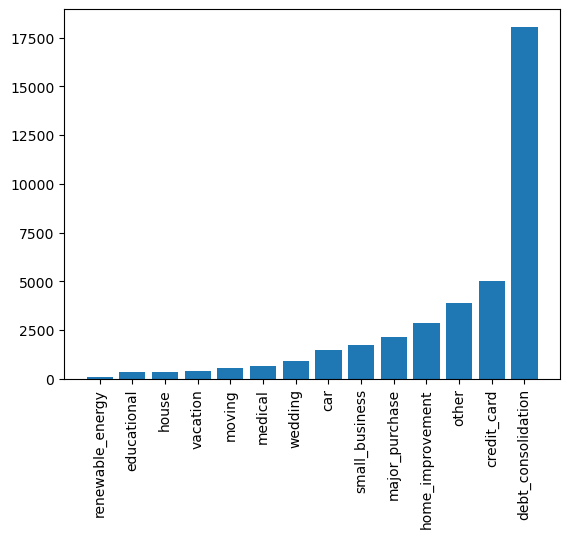

In [147]:
plot1 = plt.bar(count_by_purpose.index, count_by_purpose)
# plot for all purposes
plt.xticks(rotation=90)
plt.show()


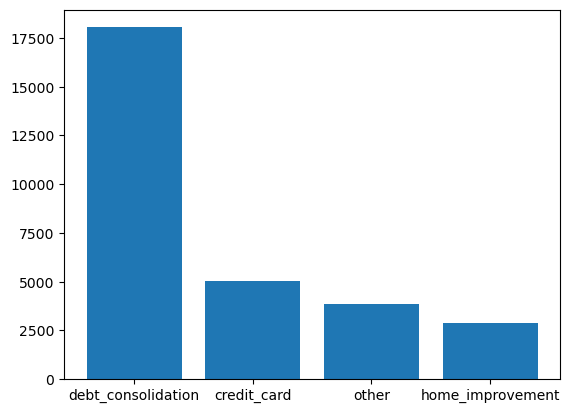

In [148]:
plot2 = plt.bar(top4_group_sizes.index, top4_group_sizes)
# plot for only top four purposes
plt.show()

> let's now compare the default rates (`loan_status`) across two types of categorical variables;
> - `purpose` of loan (constant)
> - another categorical variable (which changes)

In [149]:
# to compare the default rates across two different categorical variables: 
# one being the purpose of the loan (which remains constant), 
# and the other being another categorical variable that changes. 
# This suggests that we want to analyze how the default rates vary 
# within different categories of the second categorical variable 
# while keeping the purpose of the loan constant.

# Here's how to approach this analysis:

# Group the DataFrame by the purpose of the loan.
# Within each purpose group, further group by the second categorical variable.
# Calculate the default rate for each combination of purpose and the second categorical variable.
# Visualize the results.

# Grouped DataFrame is ready
print(loan_5_1_top4_purpose_grouped.head(3))

          id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0    1077501    1296599       5000         5000           4975.0   36 months   
13   1069866    1304956       3000         3000           3000.0   36 months   
22   1069710    1304821      10000        10000          10000.0   36 months   
6    1069639    1304742       7000         7000           7000.0   60 months   
10   1070078    1305201       6500         6500           6500.0   60 months   
11   1069908    1305008      12000        12000          12000.0   36 months   
16   1065775    1299699      10000        10000          10000.0   36 months   
80   1068994    1303432      35000        22075          22050.0   60 months   
131  1066215    1300572      24000        24000          24000.0   36 months   
3    1076863    1277178      10000        10000          10000.0   36 months   
9    1071570    1306721       5375         5375           5350.0   60 months   
14   1069057    1303503      10000      

In [150]:
loan_5_1_top4_purpose_grouped.grade

In [151]:
def_rate_test = loan_5_1_top4_purpose_grouped.apply(lambda group: get_any_rate_pct('loan_status', 1, group))
print(def_rate_test)

purpose
credit_card           10.781778
debt_consolidation    15.325395
home_improvement      12.069565
other                 16.377749
dtype: float64


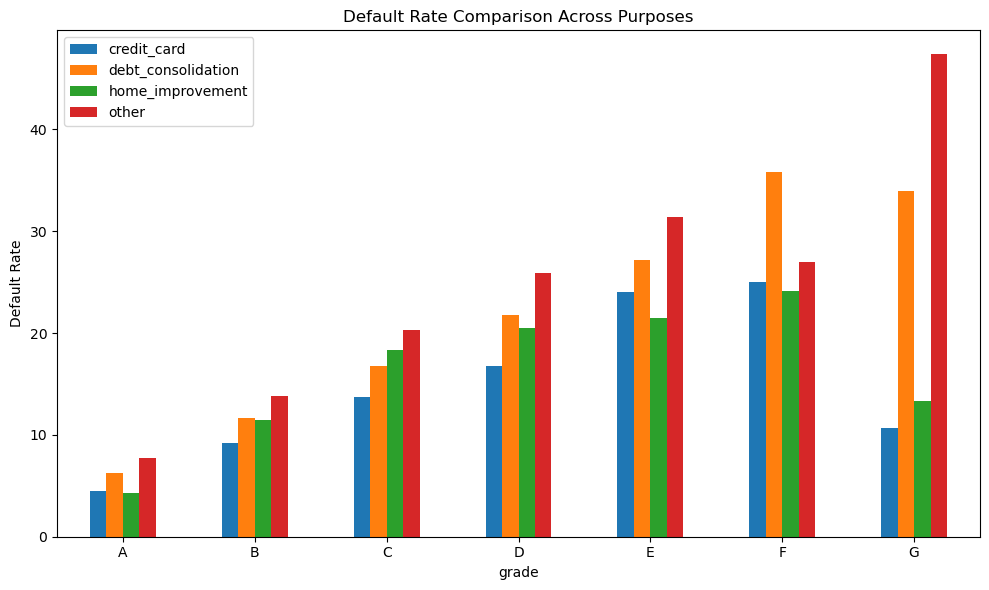

In [152]:
# Initialize a dictionary to store default rates
default_rate_dict = {}

# Loop through each purpose group
for purpose, purpose_group in loan_5_1_top4_purpose_grouped:
#     print (str(purpose) + purpose_group.int_rate)
    # Initialize a dictionary to store default rates for the current purpose
    purpose_default_rates = {}
    
    # group by second categorical variable, re-use the get_any_rate_pct to get def_rate    
    loan_groupby_second_categorical_values = pd.DataFrame(purpose_group).groupby('grade')
#     print(loan_groupby_second_categorical_values.head(3))    
    purpose_default_rates =\
        loan_groupby_second_categorical_values.apply(lambda group: get_any_rate_pct('loan_status', 1, group))    
#     print(purpose_default_rates)
            
    # Store the purpose_default_rates dictionary in the default_rate_dict dictionary
    default_rate_dict[purpose] = purpose_default_rates

# Create a DataFrame from the default_rate_dict dictionary
default_rate_df = pd.DataFrame(default_rate_dict)

# print(default_rate_df)


# Plot the default rates for each purpose
default_rate_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('grade')
plt.ylabel('Default Rate')
plt.title('Default Rate Comparison Across Purposes')
plt.xticks(rotation=0)  # If you want to keep x-axis labels horizontal
plt.tight_layout()
plt.show()

> You should be able to write your own function which takes a categorical variable and plots the default rate segmented by purpose.

> Please **create your function** named `plot_segmented`

In [153]:
def plot_segmented(cat_var, grouped_df):
    # Initialize a dictionary to store default rates
    default_rate_dict = {}

    # Loop through each purpose group
    for purpose, purpose_group in grouped_df:
    #     print (str(purpose) + purpose_group.int_rate)
        # Initialize a dictionary to store default rates for the current purpose
        purpose_default_rates = {}

        # group by second categorical variable, re-use the get_any_rate_pct to get def_rate    
        loan_groupby_second_categorical_values = pd.DataFrame(purpose_group).groupby(cat_var)
    #     print(loan_groupby_second_categorical_values.head(3))    
        purpose_default_rates =\
            loan_groupby_second_categorical_values.apply(lambda group: get_any_rate_pct('loan_status', 1, group))    
    #     print(purpose_default_rates)

        # Store the purpose_default_rates dictionary in the default_rate_dict dictionary
        default_rate_dict[purpose] = purpose_default_rates

    # Create a DataFrame from the default_rate_dict dictionary
    default_rate_df = pd.DataFrame(default_rate_dict)

    # print(default_rate_df)


    # Plot the default rates for each purpose
    default_rate_df.plot(kind='bar', figsize=(10, 6))
    plt.xlabel(str(cat_var))
    plt.ylabel('Default Rate')
    plt.title('Default Rate Comparison Across Purposes')
    plt.xticks(rotation=0)  # If you want to keep x-axis labels horizontal
    plt.tight_layout()
    plt.show()    

    
    
    
    

> Let's use the function to see if there's differences in the term.

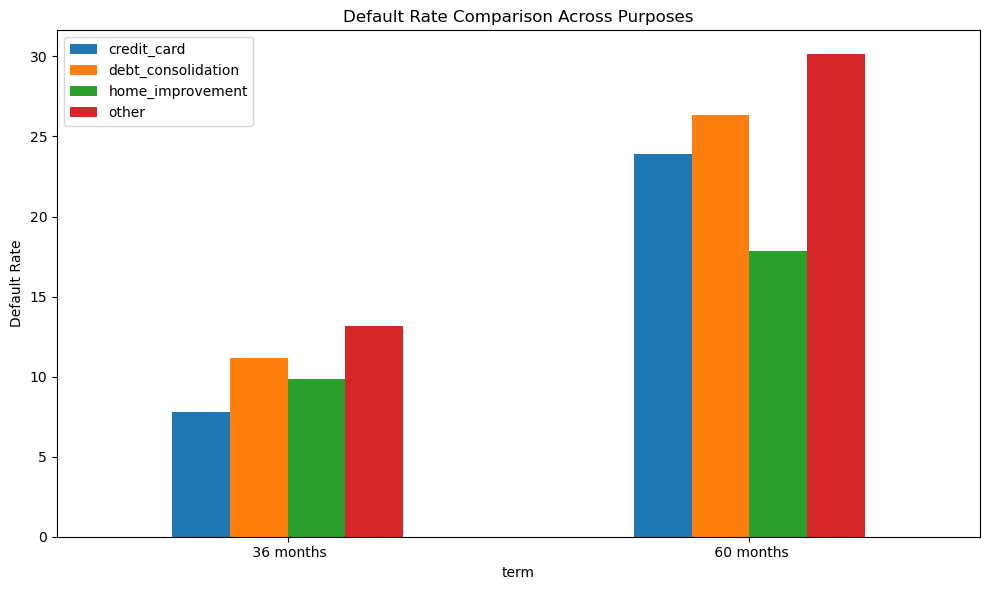

In [154]:
plot_segmented('term', loan_5_1_top4_purpose_grouped)

#### Grade of Loan (`grade`)

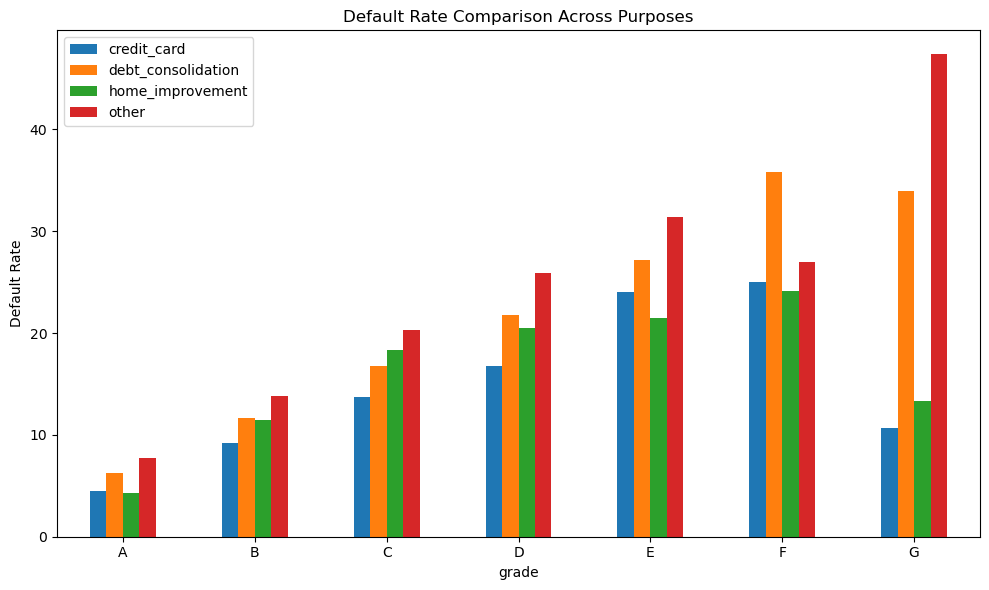

In [155]:
plot_segmented('grade', loan_5_1_top4_purpose_grouped)

#### home ownership(`home_ownership`)

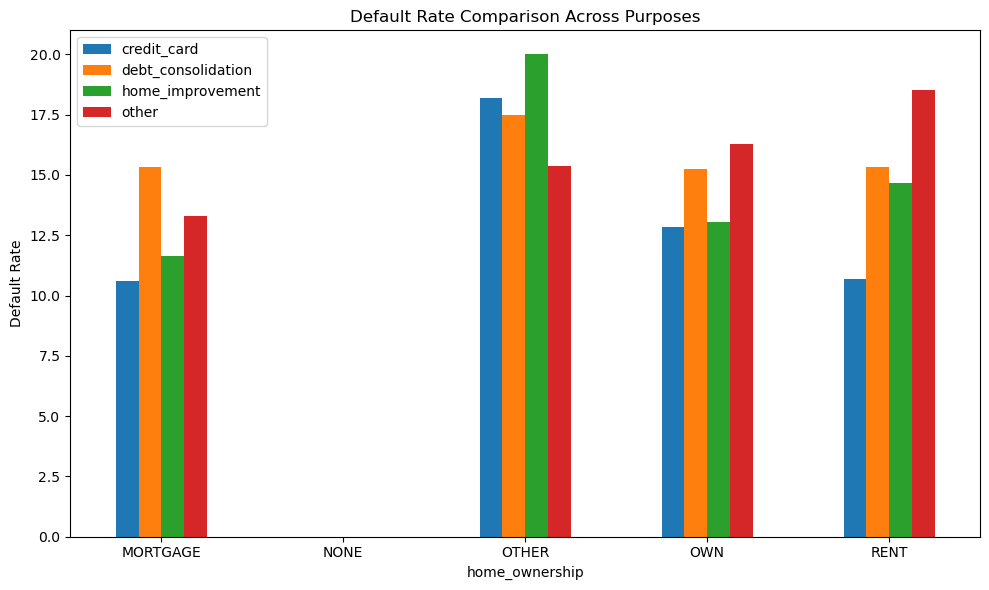

In [156]:
plot_segmented('home_ownership', loan_5_1_top4_purpose_grouped)

#### `year`

In [157]:
# there is no attributes as year, but we can derive from the issue_d data
loan_5_1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'dti',
       'initial_list_status', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

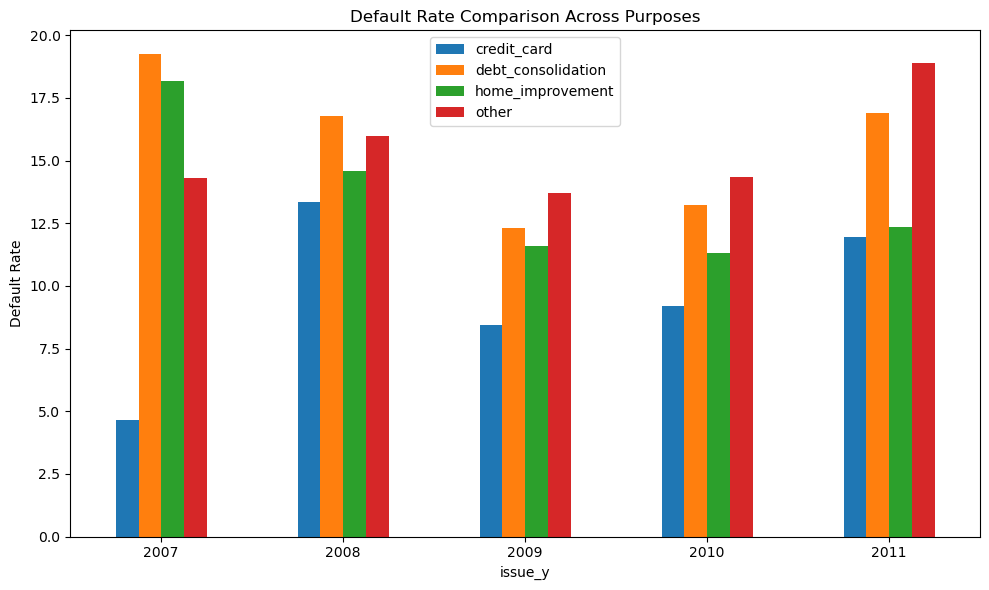

In [158]:
loan_5_1['issue_y'] = loan_5_1['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y')).apply(lambda x: x.year)

plot_segmented('issue_y', loan_5_1[loan_5_1['purpose'].isin(loan_purpose_top4_list)].groupby('purpose'))

#### `emp_length`

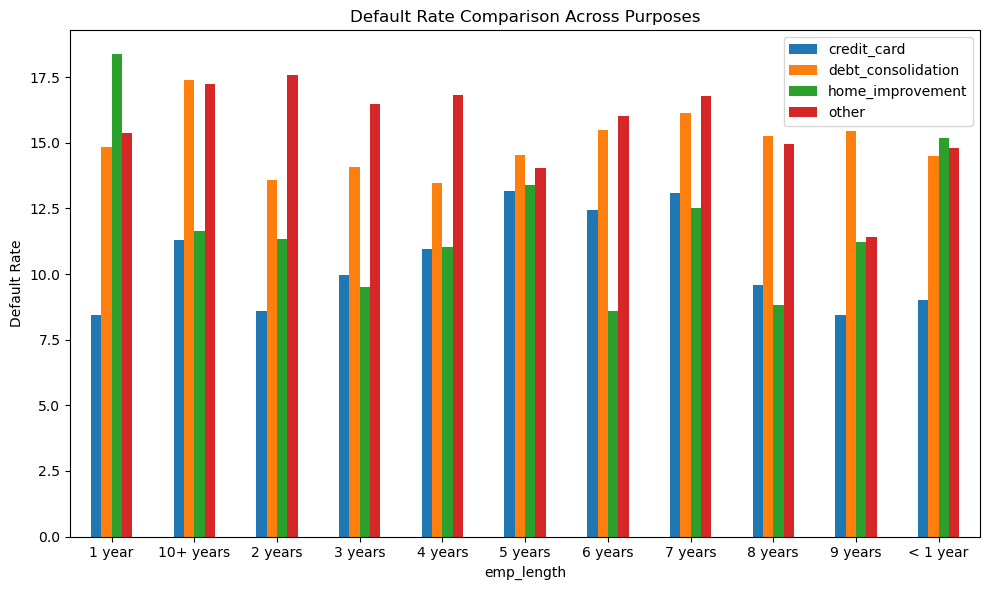

In [159]:
plot_segmented('emp_length', loan_5_1_top4_purpose_grouped)

> Loan Amount (`loan_amnt`) 

> How's the pattern compared with loan purposes?

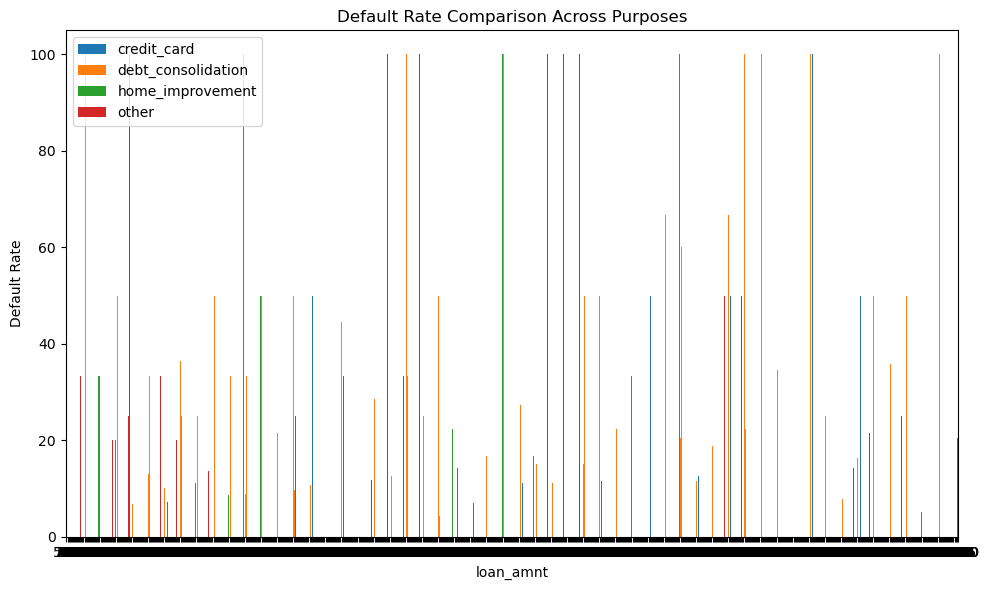

In [160]:
plot_segmented('loan_amnt', loan_5_1_top4_purpose_grouped)
# result is not so helpful

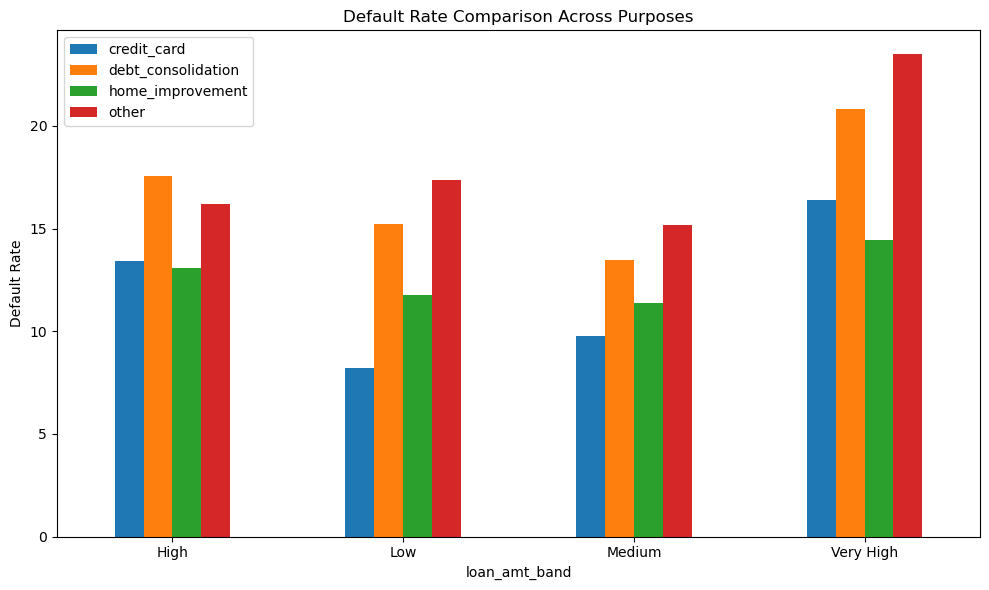

In [161]:
loan_5_1['loan_amt_band'] = loan_5_1['loan_amnt'].apply(lambda x: 'Low' if x < 5000 else\
                                                   'Medium' if x < 15000 else\
                                                   'High' if x < 25000 else\
                                                   'Very High')

plot_segmented('loan_amt_band', loan_5_1[loan_5_1['purpose'].isin(loan_purpose_top4_list)].groupby('purpose'))

> interest rate (`int_rate`)

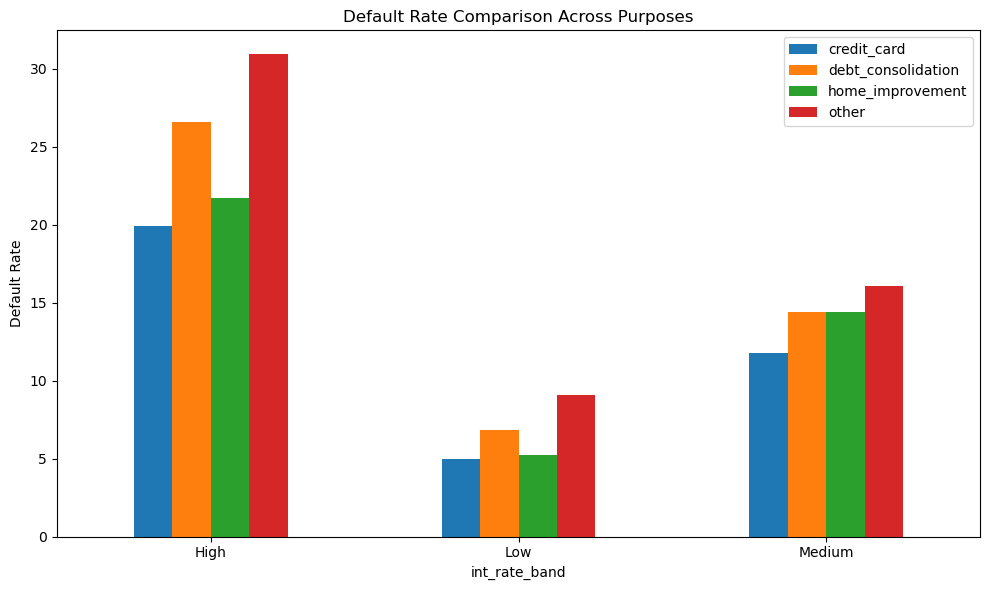

In [162]:
loan_5_1['int_rate_band'] = loan_5_1['int_rate'].apply(lambda x: 'Low' if float(x[:-1]) <= 10 else\
                                                   'Medium' if float(x[:-1]) <= 15 else\
                                                   'High')
plot_segmented('int_rate_band', loan_5_1[loan_5_1['purpose'].isin(loan_purpose_top4_list)].groupby('purpose'))

> `installment`

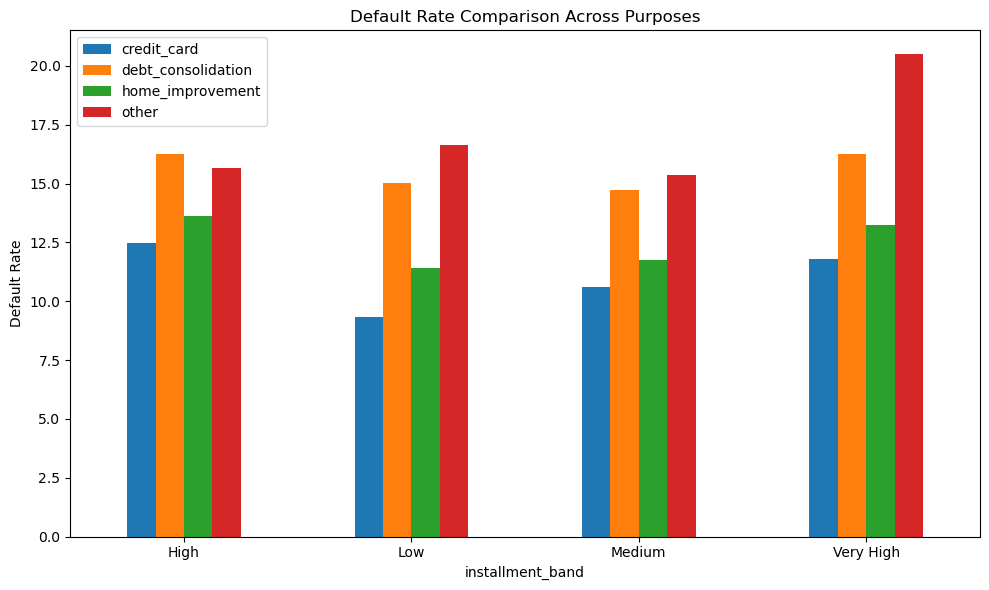

In [163]:

loan_5_1['installment_band'] = loan_5_1['installment'].apply(lambda x: 'Low' if x <= 200 else\
                                                   'Medium' if x <= 400 else\
                                                   'High' if x <= 600 else\
                                                   'Very High')

plot_segmented('installment_band', loan_5_1[loan_5_1['purpose'].isin(loan_purpose_top4_list)].groupby('purpose'))

> debt-to-income (`dti`) ratio

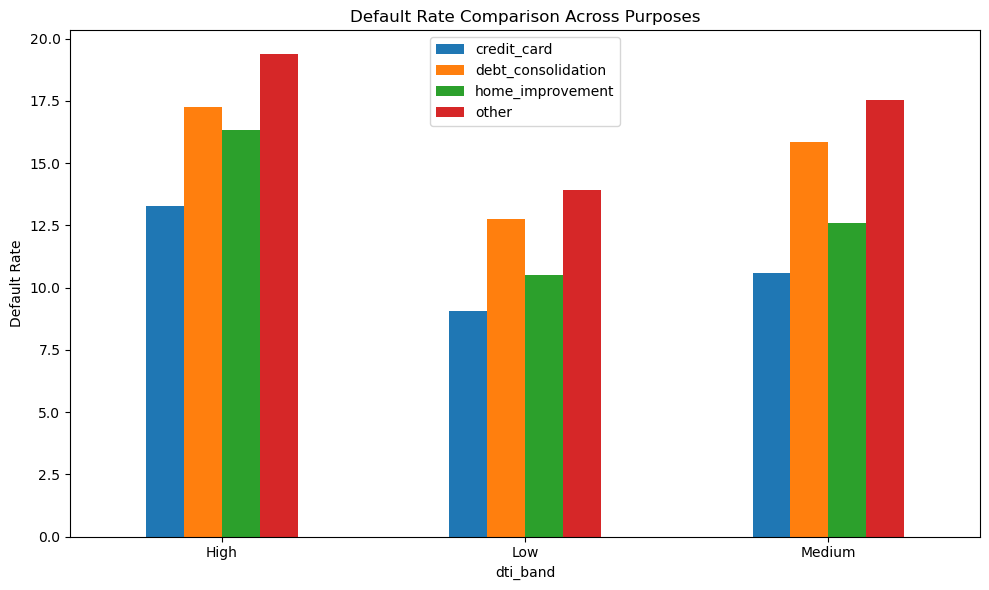

In [164]:

loan_5_1['dti_band'] = loan_5_1['dti'].apply(lambda x: 'Low' if x <= 10 else\
                                                   'Medium' if x <= 20 else\
                                                   'High')

plot_segmented('dti_band', loan_5_1[loan_5_1['purpose'].isin(loan_purpose_top4_list)].groupby('purpose'))

> Let's have a look at the role of `annual_income`

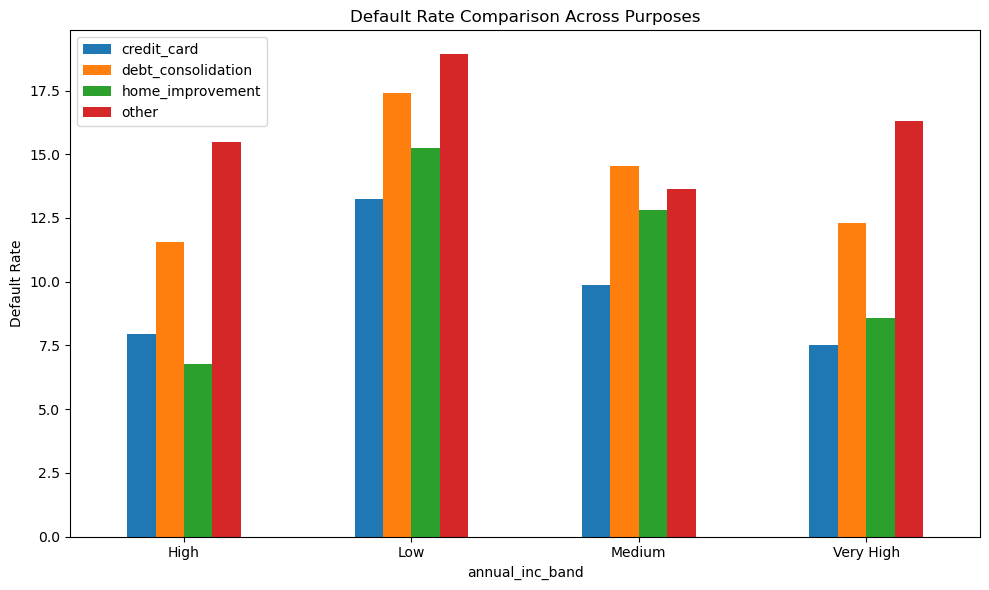

In [165]:

loan_5_1['annual_inc_band'] = loan_5_1['annual_inc'].apply(lambda x: 'Low' if x <= 5e4 else\
                                                   'Medium' if x <= 10e4 else\
                                                   'High' if x <= 15e4 else\
                                                   'Very High')

plot_segmented('annual_inc_band', loan_5_1[loan_5_1['purpose'].isin(loan_purpose_top4_list)].groupby('purpose'))

> A good way to quantify the effect of a categorical variable on default rate is to see `how much does the default rate vary across the categories`. 

> Let's see an example using `annual_inc` as the categorical variable.

> How would you examine the variation of default rate across `annual_inc`?

                         High        Low     Medium  Very High
purpose                                                       
credit_card          7.933884  13.246471   9.857978   7.526882
debt_consolidation  11.558669  17.388889  14.547577  12.305026
home_improvement     6.776181  15.234375  12.800000   8.571429
other               15.479876  18.917441  13.624842  16.296296


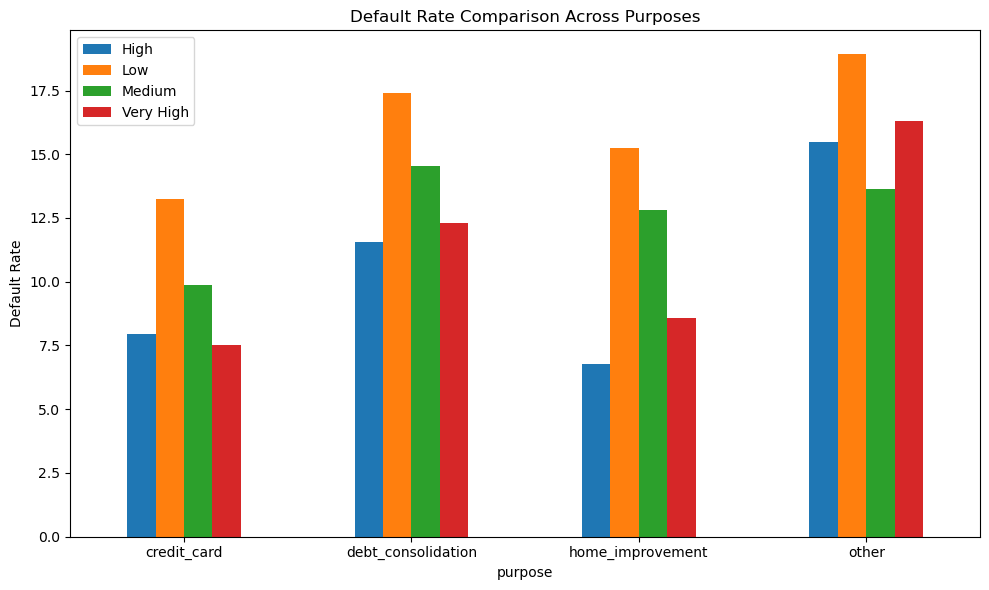

In [166]:
new_loan_5_1 = loan_5_1.copy()[loan_5_1['purpose'].isin(loan_purpose_top4_list)]
new_loan_5_1_inc_band_grouped = new_loan_5_1.groupby('annual_inc_band')

# Initialize a dictionary to store default rates
new_default_rate_dict = {}

# Loop through each purpose group
for band, inc_group in new_loan_5_1_inc_band_grouped:

    # Initialize a dictionary to store default rates for the current purpose
    band_default_rates = {}
    
    # group by second categorical variable, re-use the get_any_rate_pct to get def_rate    
    loan_groupby_2nd_categorical_values = pd.DataFrame(inc_group).groupby('purpose')
 
    band_default_rates =\
        loan_groupby_2nd_categorical_values.apply(lambda group: get_any_rate_pct('loan_status', 1, group))               
    # Store the purpose_default_rates dictionary in the default_rate_dict dictionary
    new_default_rate_dict[band] = band_default_rates

# Create a DataFrame from the default_rate_dict dictionary
new_default_rate_df = pd.DataFrame(new_default_rate_dict)
print(new_default_rate_df)
# Plot the default rates for each purpose
new_default_rate_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('purpose')
plt.ylabel('Default Rate')
plt.title('Default Rate Comparison Across Purposes')
plt.xticks(rotation=0)  # If you want to keep x-axis labels horizontal
plt.tight_layout()
plt.show()

#### Question 5.3 Write a function which takes in a categorical variable and computed the average default rate across the categories.

> You can also compute the `difference between the highest and the lowest default rate` across the categories, which is a decent metric indicating the effect of the varaible on default rate.

> Please create your own function named `diff_rate`.

In [167]:
def diff_rate_df(cat_1, cat_2, df):
#     new_loan_5_1 = loan_5_1.copy()[loan_5_1['purpose'].isin(loan_purpose_top4_list)]
#     new_loan_5_1_inc_band_grouped = new_loan_5_1.groupby('annual_inc_band')

    df_grouped = df.groupby(cat_2)

    # Initialize a dictionary to store default rates
    default_rate_dict = {}

    # Loop through each purpose group
    for tag, group in df_grouped:

        # Initialize a dictionary to store default rates for the current purpose
        default_rates = {}

        # group by second categorical variable, re-use the get_any_rate_pct to get def_rate    
        loan_groupby_2nd_cat = pd.DataFrame(group).groupby(cat_1)

        default_rates =\
            loan_groupby_2nd_cat.apply(lambda group: get_any_rate_pct('loan_status', 1, group))               
        # Store the purpose_default_rates dictionary in the default_rate_dict dictionary
        default_rate_dict[tag] = default_rates

    # Create a DataFrame from the default_rate_dict dictionary
    default_rate_df = pd.DataFrame(default_rate_dict)
    return (default_rate_df)

In [168]:
def_df = diff_rate_df('grade', 'purpose', loan_5_1[loan_5_1['purpose'].isin(loan_purpose_top4_list)])
def_df

,credit_card,debt_consolidation,home_improvement,other
grade,,,,
A,4.512894,6.295337,4.279749,7.685185
B,9.196812,11.639824,11.431871,13.834330
C,13.710451,16.736621,18.323587,20.312500
D,16.812609,21.795345,20.477816,25.887265
E,24.045802,27.175368,21.511628,31.428571
F,25.000000,35.791367,24.137931,27.027027
G,10.714286,33.950617,13.333333,47.368421


> Please use the function and draw some insights :)

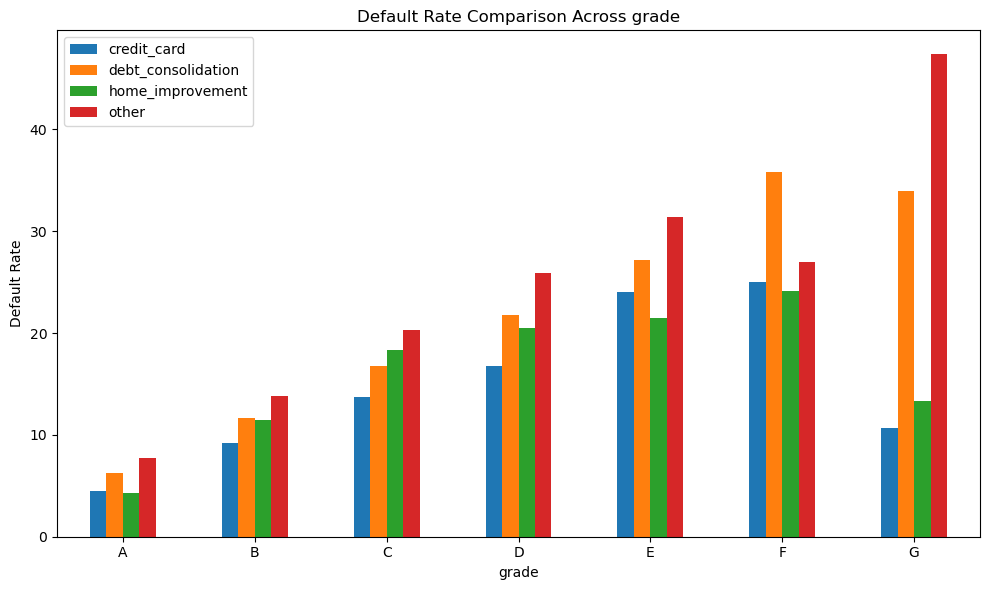

In [169]:
def_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('grade')
plt.ylabel('Default Rate')
plt.title('Default Rate Comparison Across grade')
plt.xticks(rotation=0)  # If you want to keep x-axis labels horizontal
plt.tight_layout()
plt.show()

       credit_card  debt_consolidation  home_improvement      other  \
grade                                                                 
A         4.512894            6.295337          4.279749   7.685185   
B         9.196812           11.639824         11.431871  13.834330   
C        13.710451           16.736621         18.323587  20.312500   
D        16.812609           21.795345         20.477816  25.887265   
E        24.045802           27.175368         21.511628  31.428571   
F        25.000000           35.791367         24.137931  27.027027   
G        10.714286           33.950617         13.333333  47.368421   

       Difference  
grade              
A        3.405436  
B        4.637518  
C        6.602049  
D        9.074656  
E        9.916944  
F       11.653436  
G       36.654135  


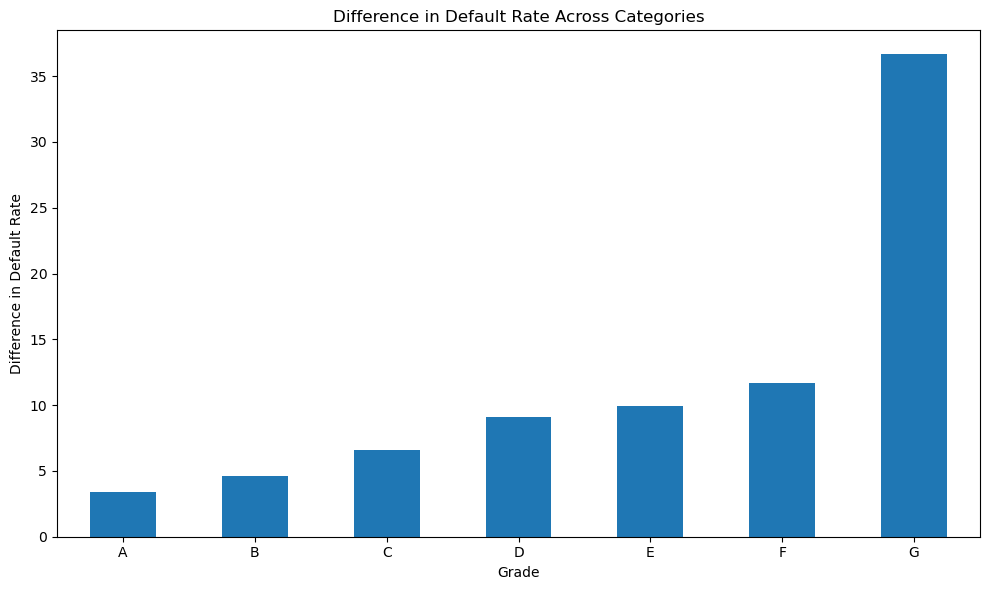

In [170]:
def_df['Difference'] = def_df.max(axis=1) - def_df.min(axis=1)

# Print the resulting DataFrame
print(def_df)

# Plot the differences
def_df['Difference'].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Grade')
plt.ylabel('Difference in Default Rate')
plt.title('Difference in Default Rate Across Categories')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [171]:
def diff_rate(cat_1, cat_2, df):
    df['Difference'] = df.max(axis=1) - df.min(axis=1)

    # Print the resulting DataFrame
    print(df)

    # Plot the differences
    df['Difference'].plot(kind='bar', figsize=(10, 6))
    plt.xlabel(cat_1)
    plt.ylabel('Difference in Default Rate')
    plt.title('Difference in Default Rate Across Categories')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()    
    return df


       credit_card  debt_consolidation  home_improvement      other  \
grade                                                                 
A         4.512894            6.295337          4.279749   7.685185   
B         9.196812           11.639824         11.431871  13.834330   
C        13.710451           16.736621         18.323587  20.312500   
D        16.812609           21.795345         20.477816  25.887265   
E        24.045802           27.175368         21.511628  31.428571   
F        25.000000           35.791367         24.137931  27.027027   
G        10.714286           33.950617         13.333333  47.368421   

       Difference  
grade              
A        4.279749  
B        9.196812  
C       13.710451  
D       16.812609  
E       21.511628  
F       24.137931  
G       36.654135  


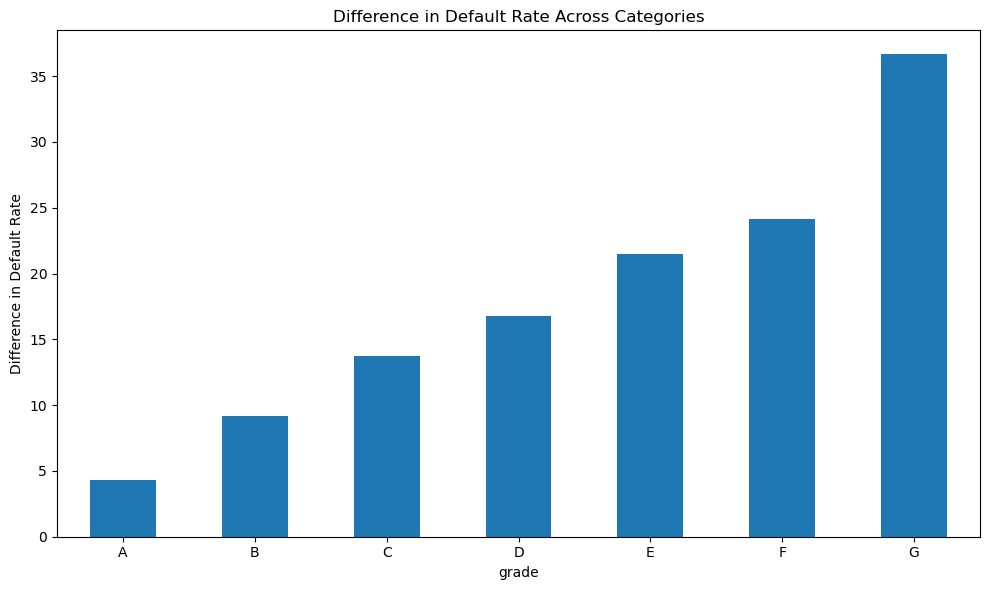

In [172]:
def_df_diff = diff_rate('grade', 'purpose', def_df)

> Thus, there is a ***`??%`*** increase in default rate as you go from high to low annual income. 

##### You might want to compute this difference for all the variables and roughly identify the ones that affect default rate the most.

### Variables in the Dataset

- `acc_now_delinq`	The number of accounts on which the borrower is now delinquent.
- `acc_open_past_24mths`	Number of trades opened in past 24 months.
- addr_state`	The state provided by the borrower in the loan application
- `all_util`	Balance to credit limit on all trades
- `annual_inc`	The self-reported annual income provided by the borrower during registration.
- `annual_inc_joint`	The combined self-reported annual income provided by the co-borrowers during registration
- `application_type`	Indicates whether the loan is an individual application or a joint application with two co-borrowers
- `avg_cur_bal`	Average current balance of all accounts
- `bc_open_to_buy`	Total open to buy on revolving bankcards.
- `bc_util`	Ratio of total current balance to high credit/credit limit for all bankcard accounts.
- `chargeoff_within_12_mths`	Number of charge-offs within 12 months
- `collection_recovery_fee`	post charge off collection fee
- `collections_12_mths_ex_med`	Number of collections in 12 months excluding medical collections
- `delinq_2yrs`	The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
- `delinq_amnt`	The past-due amount owed for the accounts on which the borrower is now delinquent.
- `desc`	Loan description provided by the borrower
- `dti`	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
- `dti_joint`	A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income
- `earliest_cr_line`	The month the borrower's earliest reported credit line was opened
- `emp_length`	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
- `emp_title`	The job title supplied by the Borrower when applying for the loan.*
- `fico_range_high`	The upper boundary range the borrower’s FICO at loan origination belongs to.
- `fico_range_low`	The lower boundary range the borrower’s FICO at loan origination belongs to.
- `funded_amnt`	The total amount committed to that loan at that point in time.
- `funded_amnt_inv`	The total amount committed by investors for that loan at that point in time.
- `grade`	LC assigned loan grade
- `home_ownership`	The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
- `id`	A unique LC assigned ID for the loan listing.
- `il_util`	Ratio of total current balance to high credit/credit limit on all install acct
- `initial_list_status`	The initial listing status of the loan. Possible values are – W, F
- `inq_fi`	Number of personal finance inquiries
- `inq_last_12m`	Number of credit inquiries in past 12 months
- `inq_last_6mths`	The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
- `installment`	The monthly payment owed by the borrower if the loan originates.
- `int_rate`	Interest Rate on the loan
- `issue_d`	The month which the loan was funded
- `last_credit_pull_d`	The most recent month LC pulled credit for this loan
- `last_fico_range_high`	The upper boundary range the borrower’s last FICO pulled belongs to.
- `last_fico_range_low`	The lower boundary range the borrower’s last FICO pulled belongs to.
- `last_pymnt_amnt`	Last total payment amount received
- `last_pymnt_d`	Last month payment was received
- `loan_amnt`	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- `loan_status`	Current status of the loan
- `max_bal_bc`	Maximum current balance owed on all revolving accounts
- `member_id`	A unique LC assigned Id for the borrower member.
- `mo_sin_old_il_acct`	Months since oldest bank installment account opened
- `mo_sin_old_rev_tl_op`	Months since oldest revolving account opened
- `mo_sin_rcnt_rev_tl_op`	Months since most recent revolving account opened
- `mo_sin_rcnt_tl`	Months since most recent account opened
- `mort_acc`	Number of mortgage accounts.
- `mths_since_last_delinq`	The number of months since the borrower's last delinquency.
- `mths_since_last_major_derog`	Months since most recent 90-day or worse rating
- `mths_since_last_record`	The number of months since the last public record.
- `mths_since_rcnt_il`	Months since most recent installment accounts opened
- `mths_since_recent_bc`	Months since most recent bankcard account opened.
- `mths_since_recent_bc_dlq`	Months since most recent bankcard delinquency
- `mths_since_recent_inq`	Months since most recent inquiry.
- `mths_since_recent_revol_delinq`	Months since most recent revolving delinquency.
- `next_pymnt_d`	Next scheduled payment date
- `num_accts_ever_120_pd`	Number of accounts ever 120 or more days past due
- `num_actv_bc_tl`	Number of currently active bankcard accounts
- `num_actv_rev_tl`	Number of currently active revolving trades
- `num_bc_sats`	Number of satisfactory bankcard accounts
- `num_bc_tl`	Number of bankcard accounts
- `num_il_tl`	Number of installment accounts
- `num_op_rev_tl`	Number of open revolving accounts
- `num_rev_accts`	Number of revolving accounts
- `num_rev_tl_bal_gt_0`	Number of revolving trades with balance >0
- `num_sats`	Number of satisfactory accounts
- `num_tl_120dpd_2m`	Number of accounts currently 120 days past due (updated in past 2 months)
- `num_tl_30dpd`	Number of accounts currently 30 days past due (updated in past 2 months)
- `num_tl_90g_dpd_24m`	Number of accounts 90 or more days past due in last 24 months
- `num_tl_op_past_12m`	Number of accounts opened in past 12 months
- `open_acc`	The number of open credit lines in the borrower's credit file.
- `open_acc_6m`	Number of open trades in last 6 months
- `open_il_12m`	Number of installment accounts opened in past 12 months
- `open_il_24m`	Number of installment accounts opened in past 24 months
- `open_il_6m`	Number of currently active installment trades
- `open_rv_12m`	Number of revolving trades opened in past 12 months
- `open_rv_24m`	Number of revolving trades opened in past 24 months
- `out_prncp`	Remaining outstanding principal for total amount funded
- `out_prncp_inv`	Remaining outstanding principal for portion of total amount funded by investors
- `pct_tl_nvr_dlq`	Percent of trades never delinquent
- `percent_bc_gt_75`	Percentage of all bankcard accounts > 75% of limit.
- `policy_code`	publicly available policy_code=1; new products not publicly available policy_code=2"
- `pub_rec`	Number of derogatory public records
- `pub_rec_bankruptcies`	Number of public record bankruptcies
- `purpose`	A category provided by the borrower for the loan request. 
- `pymnt_plan`	Indicates if a payment plan has been put in place for the loan
- `recoveries`	post charge off gross recovery
- `revol_bal`	Total credit revolving balance
- `revol_util`	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- `sub_grade`	LC assigned loan subgrade
- `tax_liens`	Number of tax liens
- `term`	The number of payments on the loan. Values are in months and can be either 36 or 60.
- `title`	The loan title provided by the borrower
- `tot_coll_amt`	Total collection amounts ever owed
- `tot_cur_bal`	Total current balance of all accounts
- `tot_hi_cred_lim`	Total high credit/credit limit
- `total_acc`	The total number of credit lines currently in the borrower's credit file
- `total_bal_ex_mort`	Total credit balance excluding mortgage
- `total_bal_il`	Total current balance of all installment accounts
- `total_bc_limit`	Total bankcard high credit/credit limit
- `total_cu_tl`	Number of finance trades
- `total_il_high_credit_limit`	Total installment high credit/credit limit
- `total_pymnt`	Payments received to date for total amount funded
- `total_pymnt_inv`	Payments received to date for portion of total amount funded by investors
- `total_rec_int`	Interest received to date
- `total_rec_late_fee`	Late fees received to date
- `total_rec_prncp`	Principal received to date
- `total_rev_hi_lim`  	Total revolving high credit/credit limit
- `url`	URL for the LC page with listing data.
- `verification_status`	Indicates if income was verified by LC, not verified, or if the income source was verified
- `verified_status_joint`	Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified
- `zip_code`	The first 3 numbers of the zip code provided by the borrower in the loan application.

### <font color="green">"Thank you for putting your efforts into the exercise problem sets :)"</font>